In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import sys
sys.path.insert(0, '../System')

from classify import get_feature_table, get_feature_groups, train_classify, group_classify, train_model, test_model
from classify import create_classification_table, create_crossval_table, create_fake_crossval_table

import pickle

CLF = LogisticRegression()

Load in the tuned classifier

In [2]:
with open("../System/clfs/standard_linear_svc.sav", 'rb') as file:
    tuned_clf = pickle.load(file)

Cross Val Score (tuned)

In [3]:
cv_tuned = train_classify(['feats'], tuned_clf)

Precision: 0.6784768440688114
Recall: 0.7225433526011561
Accuracy: 0.7389210019267822
F1-Score: 0.7345739471106758


CV Score (untuned)

In [4]:
cv_untuned = train_classify(['feats'], CLF)

Precision: 0.6773241811175337
Recall: 0.7321772639691715
Accuracy: 0.7389210019267822
F1-Score: 0.737148399612027


Confusion Matrix

In [5]:
conf = train_classify(['feats'], CLF, confusion=True)

Precision: 0.6773241811175337
Recall: 0.7321772639691715
Accuracy: 0.7389210019267822
F1-Score: 0.737148399612027
[[387 132]
 [139 380]]


Group Scores

In [6]:
group_scores = group_classify(CLF)
group_scores


complexity
Precision: 0.6027095148078134
Recall: 0.6666666666666666
Accuracy: 0.6570327552986512
F1-Score: 0.6603053435114504

deception
Precision: 0.569158848984491
Recall: 0.581888246628131
Accuracy: 0.6117533718689788
F1-Score: 0.5998013902681232

details
Precision: 0.6039600547006976
Recall: 0.6416184971098265
Accuracy: 0.6570327552986512
F1-Score: 0.6516634050880625

formality
Precision: 0.5455606218360679
Recall: 0.5433526011560693
Accuracy: 0.5780346820809249
F1-Score: 0.5628742514970059

humour
Precision: 0.542263890847001
Recall: 0.5472061657032755
Accuracy: 0.5732177263969171
F1-Score: 0.5618199802176064

imagination
Precision: 0.5589211524566474
Recall: 0.5915221579961464
Accuracy: 0.5982658959537572
F1-Score: 0.5955383123181378

vagueness
Precision: 0.5763811002789521
Recall: 0.6396917148362236
Accuracy: 0.6233140655105973
F1-Score: 0.6293838862559242

all
Precision: 0.6773241811175337
Recall: 0.7321772639691715
Accuracy: 0.7389210019267822
F1-Score: 0.737148399612027


,precision,recall,accuracy,f1
group,,,,
complexity,0.602710,0.666667,0.657033,0.660305
deception,0.569159,0.581888,0.611753,0.599801
details,0.603960,0.641618,0.657033,0.651663
formality,0.545561,0.543353,0.578035,0.562874
humour,0.542264,0.547206,0.573218,0.561820
imagination,0.558921,0.591522,0.598266,0.595538
vagueness,0.576381,0.639692,0.623314,0.629384
all,0.677324,0.732177,0.738921,0.737148


In [7]:
print(group_scores.round(3).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  precision &  recall &  accuracy &     f1 \\
group       &            &         &           &        \\
\midrule
complexity  &      0.603 &   0.667 &     0.657 &  0.660 \\
deception   &      0.569 &   0.582 &     0.612 &  0.600 \\
details     &      0.604 &   0.642 &     0.657 &  0.652 \\
formality   &      0.546 &   0.543 &     0.578 &  0.563 \\
humour      &      0.542 &   0.547 &     0.573 &  0.562 \\
imagination &      0.559 &   0.592 &     0.598 &  0.596 \\
vagueness   &      0.576 &   0.640 &     0.623 &  0.629 \\
all         &      0.677 &   0.732 &     0.739 &  0.737 \\
\bottomrule
\end{tabular}



Performance of just Complexity & Detail Features

In [8]:
complex_detail = train_classify(['feats'], CLF, groups=['complexity', 'details'])

Precision: 0.6512390545412923
Recall: 0.697495183044316
Accuracy: 0.7109826589595376
F1-Score: 0.7070312500000001


Cross val score of feats for fake news

In [9]:
cv_fake = train_classify(['fake_news_feats'], CLF, confusion=True)

Precision: 0.7041146125994432
Recall: 0.7317073170731707
Accuracy: 0.7689243027888446
F1-Score: 0.7563025210084033
[[103  25]
 [ 33  90]]


In [10]:
complex_detail = train_classify(['fake_news_feats'], CLF, groups=['complexity', 'details'])

Precision: 0.7141828350554422
Recall: 0.7642276422764228
Accuracy: 0.7808764940239044
F1-Score: 0.7736625514403292


Train on April Fools and test on Fake News with hoax set

In [11]:
af_trained_model = train_model(['feats'], CLF)
af_fake = test_model(['fake_news_feats'], af_trained_model)

Precision: 0.5547797196810897
Recall: 0.5528455284552846
Accuracy: 0.6055776892430279
F1-Score: 0.5787234042553191


Cross val score of BoW for fake news

In [12]:
cv_fake = train_classify(['fake_news_bow'], CLF, confusion=True)

Precision: 0.725101237490704
Recall: 0.6747967479674797
Accuracy: 0.7768924302788844
F1-Score: 0.7477477477477478
[[112  16]
 [ 40  83]]


Train on AF and test on FN with BoW

In [13]:
af_trained_model = train_model(['bow'], CLF)
af_fake = test_model(['fake_news_bow'], af_trained_model)

Precision: 0.46776814741157624
Recall: 0.4796747967479675
Accuracy: 0.450199203187251
F1-Score: 0.46093749999999994


Get Results Table

In [14]:
crossval_table = create_crossval_table(classifier=CLF)


complexity
Precision: 0.6027095148078134
Recall: 0.6666666666666666
Accuracy: 0.6570327552986512
F1-Score: 0.6603053435114504

deception
Precision: 0.569158848984491
Recall: 0.581888246628131
Accuracy: 0.6117533718689788
F1-Score: 0.5998013902681232

details
Precision: 0.6039600547006976
Recall: 0.6416184971098265
Accuracy: 0.6570327552986512
F1-Score: 0.6516634050880625

formality
Precision: 0.5455606218360679
Recall: 0.5433526011560693
Accuracy: 0.5780346820809249
F1-Score: 0.5628742514970059

humour
Precision: 0.542263890847001
Recall: 0.5472061657032755
Accuracy: 0.5732177263969171
F1-Score: 0.5618199802176064

imagination
Precision: 0.5589211524566474
Recall: 0.5915221579961464
Accuracy: 0.5982658959537572
F1-Score: 0.5955383123181378

vagueness
Precision: 0.5763811002789521
Recall: 0.6396917148362236
Accuracy: 0.6233140655105973
F1-Score: 0.6293838862559242

Complexity + Detail
Precision: 0.6512390545412923
Recall: 0.697495183044316
Accuracy: 0.7109826589595376
F1-Score: 0.70703

In [15]:
crossval_table = crossval_table.round(3)

In [16]:
print(crossval_table.loc[:, crossval_table.columns != 'accuracy'].to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  precision &  recall &     f1 \\
Features    &            &         &        \\
\midrule
complexity  &      0.603 &   0.667 &  0.660 \\
deception   &      0.569 &   0.582 &  0.600 \\
details     &      0.604 &   0.642 &  0.652 \\
formality   &      0.546 &   0.543 &  0.563 \\
humour      &      0.542 &   0.547 &  0.562 \\
imagination &      0.559 &   0.592 &  0.596 \\
vagueness   &      0.576 &   0.640 &  0.629 \\
feats       &      0.677 &   0.732 &  0.737 \\
comp + det  &      0.651 &   0.697 &  0.707 \\
selection   &      0.657 &   0.717 &  0.718 \\
top\_6       &      0.634 &   0.682 &  0.689 \\
bow         &      0.745 &   0.767 &  0.792 \\
bow + feats &      0.762 &   0.790 &  0.810 \\
all         &      0.762 &   0.790 &  0.810 \\
\bottomrule
\end{tabular}



In [17]:
fake_results = create_fake_crossval_table(classifier=LogisticRegression()).round(3)
print(fake_results.loc[:, fake_results.columns != 'accuracy'].to_latex())


complexity
Precision: 0.6693800158963894
Recall: 0.7073170731707317
Accuracy: 0.7370517928286853
F1-Score: 0.725

deception
Precision: 0.5169791764068132
Recall: 0.4715447154471545
Accuracy: 0.549800796812749
F1-Score: 0.5065502183406113

details
Precision: 0.6203850977490694
Recall: 0.6422764227642277
Accuracy: 0.6852589641434262
F1-Score: 0.6666666666666667

formality
Precision: 0.5624526285103488
Recall: 0.6585365853658537
Accuracy: 0.6175298804780877
F1-Score: 0.627906976744186

humour
Precision: 0.48419641627298804
Recall: 0.3821138211382114
Accuracy: 0.4900398406374502
F1-Score: 0.4234234234234235

imagination
Precision: 0.4505447046502338
Recall: 0.25203252032520324
Accuracy: 0.38645418326693226
F1-Score: 0.287037037037037

vagueness
Precision: 0.5297437831280978
Recall: 0.5040650406504065
Accuracy: 0.5697211155378487
F1-Score: 0.5344827586206896

Complexity + Detail
Precision: 0.7141828350554422
Recall: 0.7642276422764228
Accuracy: 0.7808764940239044
F1-Score: 0.77366255144032

Make Cross Val Table for Paper

In [18]:
accs_af = crossval_table.loc[:, crossval_table.columns == 'accuracy']
accs_af.columns = ["April Fools"]

accs_af = accs_af.drop(['top_6', 'all'])
accs_af.index = ['Complexity', 'Deception', 'Details', 'Formality', 'Humour', 'Imagination',
                'Vagueness', 'Hoax Set', 'Complex-Detail', 'Selection', 'Bag-of-Words', 'BoW + Hoax']
accs_af

,April Fools
Complexity,0.657
Deception,0.612
Details,0.657
Formality,0.578
Humour,0.573
Imagination,0.598
Vagueness,0.623
Hoax Set,0.739
Complex-Detail,0.711
Selection,0.719


In [19]:
accs_fake = fake_results.loc[:, fake_results.columns == 'accuracy']
accs_fake.columns = ['Fake News']

accs_fake = accs_fake.drop(['top_6'])
accs_fake.index = ['Complexity', 'Deception', 'Details', 'Formality', 'Humour', 'Imagination',
                'Vagueness', 'Hoax Set', 'Complex-Detail', 'Selection', 'Bag-of-Words', 'BoW + Hoax']

accs_fake

,Fake News
Complexity,0.737
Deception,0.550
Details,0.685
Formality,0.618
Humour,0.490
Imagination,0.386
Vagueness,0.570
Hoax Set,0.769
Complex-Detail,0.781
Selection,0.777


In [20]:
print(pd.concat([accs_af, accs_fake], axis=1).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  April Fools &  Fake News \\
\midrule
Complexity     &        0.657 &      0.737 \\
Deception      &        0.612 &      0.550 \\
Details        &        0.657 &      0.685 \\
Formality      &        0.578 &      0.618 \\
Humour         &        0.573 &      0.490 \\
Imagination    &        0.598 &      0.386 \\
Vagueness      &        0.623 &      0.570 \\
Hoax Set       &        0.739 &      0.769 \\
Complex-Detail &        0.711 &      0.781 \\
Selection      &        0.719 &      0.777 \\
Bag-of-Words   &        0.799 &      0.777 \\
BoW + Hoax     &        0.815 &      0.765 \\
\bottomrule
\end{tabular}



Make the cross validation chart!

In [21]:
pipeline = Pipeline([
            ('normalizer', StandardScaler()),           # Step1 - normalize data
            ('clf', LogisticRegression())               # Step2 - classifier
            ])

scoring = ['accuracy']

In [22]:
feats = pd.read_csv("../System/feats_train.csv")
feats.set_index('index', inplace=True)
af_labels = feats["class"]
feats.drop('class', axis=1, inplace=True)

bow = pd.read_csv("../System/bow_train.csv")
bow.set_index('index', inplace=True)
bow.drop('class', axis=1, inplace=True)

fakes = pd.read_csv("../System/fake_news_feats_train.csv")
fakes.set_index('index', inplace=True)
fake_labels = fakes["class"]
fakes.drop('class', axis=1, inplace=True)

fake_bow = pd.read_csv("../System/fake_news_bow_train.csv")
fake_bow.set_index('index', inplace=True)
fake_bow.drop('class', axis=1, inplace=True)

Build the dictionary of feature tables.

In [23]:
feature_set_names = ['complexity', 'deception', 'details', 'formality', 'humour', 'imagination', 'vagueness']
selection_feats = ['avg_sentence_len', 'body_punctuation', 'readability', 'lexical_diversity',
                   'fp_pronouns', 'time_related', 'sense_words', 'proper_nouns', 'ap_date',
                   'ap_num', 'preposition', 'adjectives', 'ima_conjunctions', 'degree_adverbs']

feature_sets = dict()

for name in feature_set_names:
    curr = []
    with open("feature_sets/{}.txt".format(name)) as file:
        for line in file:
            if '-' not in line:
                curr.append(line.strip())
    feature_sets[name] = curr

Build AF Feature Tables

In [24]:
af_feature_tables = dict()
af_scores = dict()

for name in feature_set_names:
    af_feature_tables[name] = feats.loc[:, feature_sets[name]]
    
af_feature_tables['Hoax Set'] = feats
af_feature_tables['Complexity + Detail'] = pd.concat([af_feature_tables['complexity'],
                                                     af_feature_tables['details']], axis=1)
af_feature_tables['Selection'] = feats.loc[:, selection_feats]
af_feature_tables['Bag-of-Words'] = bow
af_feature_tables['BoW + Hoax'] = pd.concat([feats, bow], axis=1)
    
for name in af_feature_tables.keys():
    af_scores[name] = cross_validate(pipeline, af_feature_tables[name],
                                 af_labels, scoring=scoring, cv=10)

Build Fake News Feature Tables

In [25]:
def train_af_test_fake(af_table, fake_table, training_labels, testing_labels):
    scaled_af = StandardScaler().fit_transform(af_table)
    classifier = CLF.fit(scaled_af, training_labels)
    scaled_fake = StandardScaler().fit_transform(fake_table)
    predicted = classifier.predict(scaled_fake)
    return metrics.accuracy_score(testing_labels, predicted)

In [26]:
fake_feature_tables = dict()
fake_scores = dict()
fake_trained_on_af = dict()

for name in feature_set_names:
    fake_feature_tables[name] = fakes.loc[:, feature_sets[name]]
    
fake_feature_tables['Hoax Set'] = fakes
fake_feature_tables['Complexity + Detail'] = pd.concat([fake_feature_tables['complexity'],
                                                     fake_feature_tables['details']], axis=1)
fake_feature_tables['Selection'] = fakes.loc[:, selection_feats]
fake_feature_tables['Bag-of-Words'] = fake_bow
fake_feature_tables['BoW + Hoax'] = pd.concat([fakes, fake_bow], axis=1)
    
for name in fake_feature_tables.keys():
    fake_scores[name] = cross_validate(pipeline, fake_feature_tables[name],
                                 fake_labels, scoring=scoring, cv=10)
    fake_trained_on_af[name] = train_af_test_fake(af_feature_tables[name],
                                                 fake_feature_tables[name],
                                                 af_labels, fake_labels)

Get Cross-Val Scores

In [27]:
af_test_scores = dict()
for name in af_feature_tables.keys():
    af_test_scores[name] = af_scores[name]['test_accuracy']
    
af_test_pd = pd.DataFrame(af_test_scores)

fake_test_scores = dict()
for name in fake_feature_tables.keys():
    fake_test_scores[name] = fake_scores[name]['test_accuracy']
    
fake_test_pd = pd.DataFrame(fake_test_scores)

In [28]:
fake_trained_on_af["Bag-of-Words"]

0.4940239043824701

Plot AF Graph

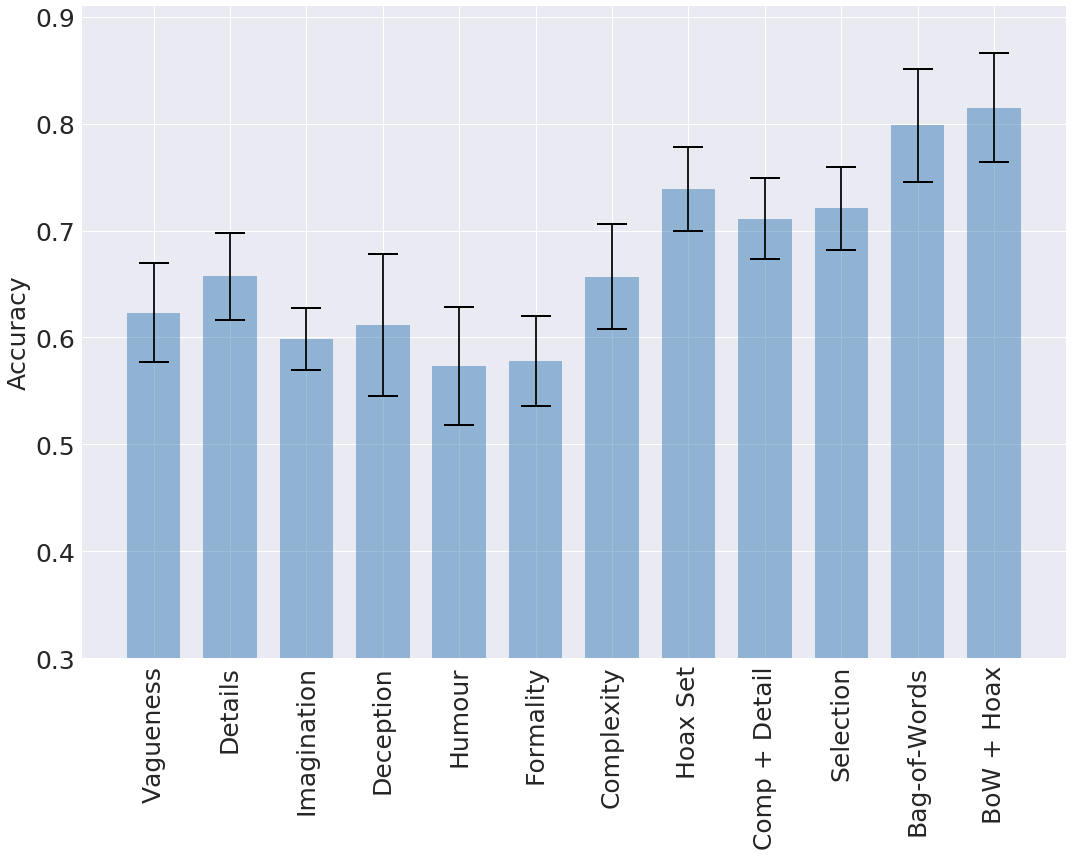

In [32]:
fig, ax = plt.subplots(figsize=(15, 12))
x_pos = np.arange(len(af_test_pd.columns))

sorted_names = ['vagueness', 'details', 'imagination', 'deception', 'humour', 'formality',
               'complexity', 'Hoax Set', 'Complexity + Detail', 'Selection',
                'Bag-of-Words', 'BoW + Hoax']
sorted_means = [af_test_pd.mean()[name] for name in sorted_names]
sorted_stds = [af_test_pd.std()[name] for name in sorted_names]

axis_labels = ['Vagueness', 'Details', 'Imagination', 'Deception', 'Humour', 'Formality', 
                'Complexity', 'Hoax Set', 'Comp + Detail', 'Selection',
                'Bag-of-Words', 'BoW + Hoax']

col_width = 0.7

# cv_scores.plot.bar(ax=ax, yerr=cv_stds, capsize=10)
ax.bar(x=x_pos, height=sorted_means, width=col_width, 
       align='center', alpha=0.5, color="#377eb8")

(_, caps, _) = plt.errorbar(x=x_pos, y=sorted_means, yerr=sorted_stds,
                            capsize=15, color='#000000', fmt='x')
for cap in caps:
    cap.set_color('#000000')
    cap.set_markeredgewidth(2)

ax.set_xticks(x_pos)
ax.set_xticklabels(axis_labels, rotation='vertical')
ax.set_ylim(ymin=0.3)
ax.set_ylabel("Accuracy")
ax.yaxis.grid(True)

ax.tick_params(labelsize=25)
ax.set_ylabel('Accuracy', fontsize=25)

plt.tight_layout()
plt.show()
fig.savefig("graphs/af_results.pdf", bbox_inches='tight')

Plot Fake News Graph

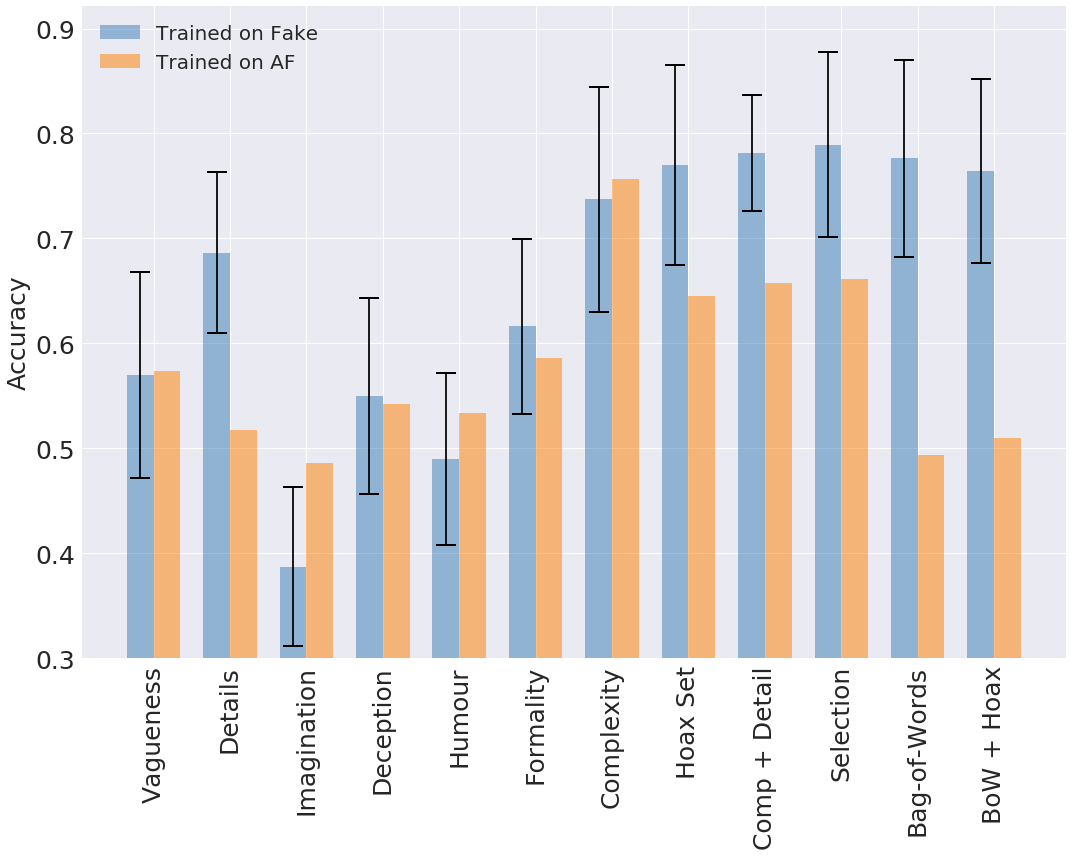

In [31]:
fig, ax = plt.subplots(figsize=(15, 12))
x_pos = np.arange(len(af_test_pd.columns))

sorted_names = ['vagueness', 'details', 'imagination', 'deception', 'humour', 'formality',
               'complexity', 'Hoax Set', 'Complexity + Detail', 'Selection',
                'Bag-of-Words', 'BoW + Hoax']
sorted_means = [fake_test_pd.mean()[name] for name in sorted_names]
sorted_stds = [fake_test_pd.std()[name] for name in sorted_names]
sorted_af_fake = [fake_trained_on_af[name] for name in sorted_names]

axis_labels = ['Vagueness', 'Details', 'Imagination', 'Deception', 'Humour', 'Formality', 
                'Complexity', 'Hoax Set', 'Comp + Detail', 'Selection',
                'Bag-of-Words', 'BoW + Hoax']

col_width = 0.35

# cv_scores.plot.bar(ax=ax, yerr=cv_stds, capsize=10)
bar1 = ax.bar(x=x_pos, height=sorted_means, width=col_width,
       align='center', alpha=0.5, color="#377eb8")

bar2 = ax.bar(x=x_pos+col_width, height=sorted_af_fake, width=col_width,
       align='center', alpha=0.5, color="#ff7f00")

(_, caps, _) = plt.errorbar(x=x_pos, y=sorted_means, yerr=sorted_stds,
                            capsize=10, color='#000000', fmt='x')
for cap in caps:
    cap.set_color('#000000')
    cap.set_markeredgewidth(2)

ax.set_xticks(x_pos+col_width/2)
ax.set_xticklabels(axis_labels, rotation='vertical')
ax.set_ylim(ymin=0.3)
ax.set_ylabel("Accuracy")
ax.yaxis.grid(True)

ax.tick_params(labelsize=25)
ax.set_ylabel('Accuracy', fontsize=25)

ax.legend((bar1, bar2), ("Trained on Fake", "Trained on AF"), prop={'size': 20})

plt.tight_layout()
plt.show()
fig.savefig("graphs/fake_results.pdf", bbox_inches='tight')